In [1]:
## Overview 

In [1]:
### Import Libraries
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import decomposition
from joblib import dump, load

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, f1_score, cohen_kappa_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


import time
import sys
sys.path.insert(0,'../../../../../utils/')
from helper_functions import *
#import helper_function custom library
from model_builder import ModelBuilder
pd.options.mode.chained_assignment = None
%matplotlib inline 

In [2]:
### Import and Clean Data
#load spectra data
df_aug = pd.read_csv("../../../../../data/refCanopies0802_0630.txt")
df_sep = pd.read_csv("../../../../../data/refCanopies0917_0630.txt")
df_oct = pd.read_csv("../../../../../data/refCanopies1016_0630.txt")

#load tree data
df_tree = pd.read_csv("../../../../../data/Export_Output_2_0630.txt")

In [3]:
## August Image Models

In [4]:
### No Dimension Reduction

In [5]:
#clean and split data

mb_aug = ModelBuilder(df_aug,df_tree)
df_aug = mb_aug.image


data cleaning in progress ...

data cleaning completed.
   ROIID  IDwithROI  396.33  398.01   399.7  401.38  403.07  404.75  406.44  \
2      1          3 -0.0028 -0.0016 -0.0002  0.0014  0.0032  0.0052  0.0075   
3      1          4 -0.0028 -0.0016 -0.0002  0.0014  0.0032  0.0052  0.0075   
4      1          5  0.0064  0.0058  0.0057  0.0058  0.0065  0.0078  0.0080   
5      1          6  0.0064  0.0058  0.0057  0.0058  0.0065  0.0078  0.0080   
6      1          7  0.0064  0.0058  0.0057  0.0058  0.0065  0.0078  0.0080   

   408.13  ...  886.78   888.5  890.22  891.94  893.66  895.38   897.1  \
2  0.0092  ...  0.2337  0.2359  0.2388  0.2425   0.247  0.2526  0.2440   
3  0.0092  ...  0.2337  0.2359  0.2388  0.2425   0.247  0.2526  0.2440   
4  0.0078  ...  0.3018  0.3044  0.3063  0.3079   0.309  0.3098  0.3109   
5  0.0078  ...  0.3018  0.3044  0.3063  0.3079   0.309  0.3098  0.3109   
6  0.0078  ...  0.3018  0.3044  0.3063  0.3079   0.309  0.3098  0.3109   

   898.81  900.53  TARGE

In [6]:
#split into features and labels 
X = df_aug[df_aug.columns[2:-1]]
y = LabelEncoder().fit_transform(df_aug.TARGET)
x_train,x_test,y_train,y_test = train_test_split(X,y,  test_size=0.30, random_state=101)

In [7]:
#import model
aug_model = joblib.load('models/species_hyper_ind_nd_aug.joblib')

In [8]:
#make predictions
aug_preds = aug_model.predict(x_test)

[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.3s finished


In [9]:
#labels for confusion matrix
labels = ['Sugar Maple', "Eastern Redbud", "Green Ash", 'Norway Spruce','Austrian Pine','Ponderosa Pine',
          'Colorado Spruce', 'Scotch Pine','White Oak','Bur Oak', 'Red Oak']

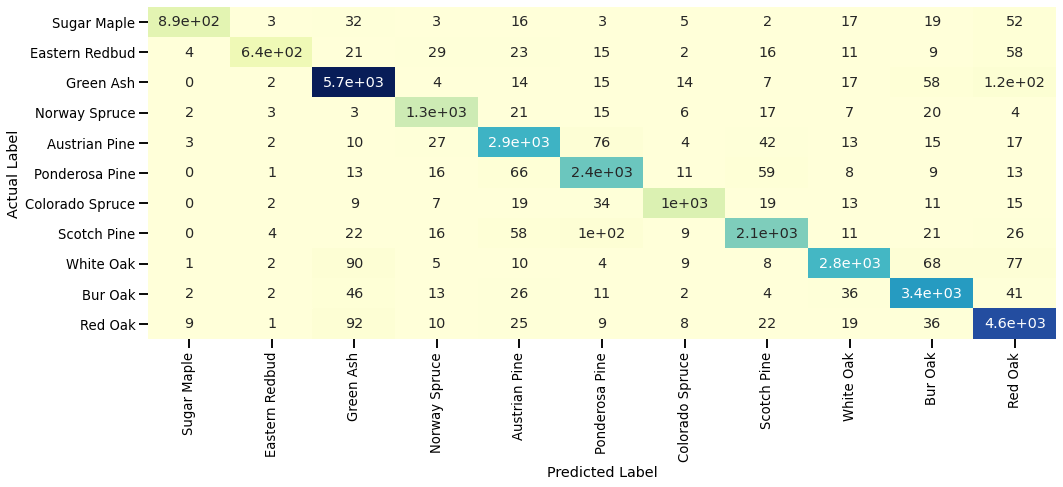

In [10]:
#generate a confusion matrix
aug_cf = confusion_matrix(y_test, aug_preds)
#plot confusion matrix
sns.set_context('talk', font_scale=0.8)
#labels = ['Ash', "Pines", "Spruce", 'Oaks']
plt.figure(figsize = (15,7))
sns.heatmap(aug_cf,annot=True, xticklabels = labels,yticklabels= labels,
        cmap = "YlGnBu", cbar = False)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()

In [11]:
#index and cols mapper 
mapper = dict(zip(list(range(0,11)),labels))

In [12]:
#confusion matrix as a pandas dataframe
y_actual = pd.Series(y_test, name = 'actual')
y_preds = pd.Series(aug_preds,  name = 'predicted')
aug_confusion = pd.crosstab(y_actual, y_preds)
#rename index
aug_confusion.rename(mapper, inplace = True)
#rename columns
aug_confusion.rename(mapper, axis =1, inplace =True)
aug_confusion

predicted,Sugar Maple,Eastern Redbud,Green Ash,Norway Spruce,Austrian Pine,Ponderosa Pine,Colorado Spruce,Scotch Pine,White Oak,Bur Oak,Red Oak
actual,,,,,,,,,,,
Sugar Maple,893,3,32,3,16,3,5,2,17,19,52
Eastern Redbud,4,636,21,29,23,15,2,16,11,9,58
Green Ash,0,2,5701,4,14,15,14,7,17,58,117
Norway Spruce,2,3,3,1330,21,15,6,17,7,20,4
Austrian Pine,3,2,10,27,2917,76,4,42,13,15,17
Ponderosa Pine,0,1,13,16,66,2373,11,59,8,9,13
Colorado Spruce,0,2,9,7,19,34,1048,19,13,11,15
Scotch Pine,0,4,22,16,58,100,9,2140,11,21,26
White Oak,1,2,90,5,10,4,9,8,2812,68,77


In [13]:
#mapper_total 
mapper_cols = {x:np.sum(aug_confusion[x]) for x in aug_confusion.columns}

In [14]:
#add totals on df_aug (predicted labels)
aug_confusion.loc['Total_Predicted'] = list(mapper_cols.values())

In [15]:
#actual 
mapper_rows = {x:np.sum(aug_confusion.loc[x]) for x in aug_confusion.index}

In [16]:
#add totals on df_aug (actual labels)
aug_confusion['Total_Actual']= list(mapper_rows.values())

In [17]:
aug_confusion

predicted,Sugar Maple,Eastern Redbud,Green Ash,Norway Spruce,Austrian Pine,Ponderosa Pine,Colorado Spruce,Scotch Pine,White Oak,Bur Oak,Red Oak,Total_Actual
actual,,,,,,,,,,,,
Sugar Maple,893,3,32,3,16,3,5,2,17,19,52,1045
Eastern Redbud,4,636,21,29,23,15,2,16,11,9,58,824
Green Ash,0,2,5701,4,14,15,14,7,17,58,117,5949
Norway Spruce,2,3,3,1330,21,15,6,17,7,20,4,1428
Austrian Pine,3,2,10,27,2917,76,4,42,13,15,17,3126
Ponderosa Pine,0,1,13,16,66,2373,11,59,8,9,13,2569
Colorado Spruce,0,2,9,7,19,34,1048,19,13,11,15,1177
Scotch Pine,0,4,22,16,58,100,9,2140,11,21,26,2407
White Oak,1,2,90,5,10,4,9,8,2812,68,77,3086


In [18]:
#add precision/user accuracy
#among all predicted true class, how many were actually true
precision = [round((aug_confusion.loc[x][x]/aug_confusion.loc['Total_Predicted'][x])*100) for x in aug_confusion.columns[:-1]]
precision.append(float('nan'))
aug_confusion.loc['precision/user\'s accuracy'] = precision
aug_confusion.tail(3)


predicted,Sugar Maple,Eastern Redbud,Green Ash,Norway Spruce,Austrian Pine,Ponderosa Pine,Colorado Spruce,Scotch Pine,White Oak,Bur Oak,Red Oak,Total_Actual
actual,,,,,,,,,,,,
Red Oak,9.0,1.0,92.0,10.0,25.0,9.0,8.0,22.0,19.0,36.0,4552.0,4783.0
Total_Predicted,914.0,658.0,6039.0,1460.0,3195.0,2655.0,1118.0,2336.0,2964.0,3646.0,4972.0,29957.0
precision/user's accuracy,98.0,97.0,94.0,91.0,91.0,89.0,94.0,92.0,95.0,93.0,92.0,NaN


In [19]:
#add recall/producer's accuracy
recall = [round((aug_confusion.loc[x][x]/aug_confusion.loc[x]['Total_Actual'])*100) for x in aug_confusion.index[:-2]]
recall.append(float('nan'))
recall.append(float('nan'))
aug_confusion['recall/producer\'s accuracy'] = recall
aug_confusion.tail(3)

predicted,Sugar Maple,Eastern Redbud,Green Ash,Norway Spruce,Austrian Pine,Ponderosa Pine,Colorado Spruce,Scotch Pine,White Oak,Bur Oak,Red Oak,Total_Actual,recall/producer's accuracy
actual,,,,,,,,,,,,,
Red Oak,9.0,1.0,92.0,10.0,25.0,9.0,8.0,22.0,19.0,36.0,4552.0,4783.0,95.0
Total_Predicted,914.0,658.0,6039.0,1460.0,3195.0,2655.0,1118.0,2336.0,2964.0,3646.0,4972.0,29957.0,NaN
precision/user's accuracy,98.0,97.0,94.0,91.0,91.0,89.0,94.0,92.0,95.0,93.0,92.0,NaN,NaN


In [20]:
#calculate F1 score 
aug_f1 = f1_score(y_actual, y_preds, average = 'macro')
aug_f1

0.9172595311352582

In [21]:
#aug_confusion.to_csv('august_species_hyper_ind_accuracy_assessment.csv')

In [22]:
#kappa score 
cohen_kappa_score(y_actual, y_preds )

0.9173401385684358

In [23]:
#overall accuracy
accuracy_score(y_actual, y_preds)

0.9273959341723137

In [ ]:
#build random forest model with ntree = 100
model_aug = mb_aug.build_model(x_train, y_train)

In [ ]:
#evaluate the model
#create a confusion matrix
labels = ['Sugar Maple', "Eastern Redbud", "Green Ash", 'Norway Spruce','Austrian Pine','Ponderosa Pine',
          'Colorado Spruce', 'Scotch Pine','White Oak','Bur Oak', 'Red Oak']
nclasses = 11
model_name = 'species_hyper_ind_nd_aug'
curr_evals.append(pd.DataFrame.from_dict(evaluate_model(model_aug,model_name,
                                                       x_train,y_train,x_test,y_test,nclasses,labels)))

In [ ]:
#save the model
save_model(model_aug,model_name)

In [ ]:
### Dimension Reduction with PCA

In [ ]:
#build pca model with n_compoments = 30
x_train,x_test,y_train,y_test, pc_plot = mb_aug.build_pca_model(30)
model_aug_pc = mb_aug.build_model(x_train,y_train)

In [ ]:
#pc_plot
make_pc_plot(pc_plot)

In [ ]:
#evaluate the model
model_name = 'species_hyper_ind_pc30_aug'
curr_evals.append(pd.DataFrame.from_dict(evaluate_model(model_aug_pc,model_name,
                                                       x_train,y_train,x_test,y_test,nclasses,labels)))

In [ ]:
#save the model
save_model(model_aug_pc,model_name)

In [ ]:
## September Image Models

In [ ]:
### No Dimension Reduction

In [ ]:
#clean and split data
mb_sep = ModelBuilder(df_sep,df_tree)
x_train,x_test,y_train,y_test = mb_sep.split_data()

In [ ]:
#build random forest model with ntree = 100
model_sep = mb_sep.build_model(x_train, y_train)

In [ ]:
model_name = 'species_hyper_ind_nd_sep'
curr_evals.append(pd.DataFrame.from_dict(evaluate_model(model_sep,model_name,
                                                       x_train,y_train,x_test,y_test,nclasses,labels)))

In [ ]:
#save the model
save_model(model_sep,model_name)

In [ ]:
### Dimension Reduction with PCA

In [ ]:
#build pca model with n_compoments = 30
x_train,x_test,y_train,y_test,pc_plot = mb_sep.build_pca_model(30)
model_sep_pc = mb_sep.build_model(x_train,y_train)

In [ ]:
#pc_plot
make_pc_plot(pc_plot)

In [ ]:
#evaluate the model
model_name = 'species_hyper_ind_pc30_sep'
curr_evals.append(pd.DataFrame.from_dict(evaluate_model(model_sep_pc,model_name,
                                                       x_train,y_train,x_test,y_test,nclasses,labels)))

In [ ]:
#save the model
save_model(model_sep_pc,model_name)

In [ ]:
## October Image Models

In [ ]:
### No Dimension Reduction

In [ ]:
#clean and split data
mb_oct = ModelBuilder(df_oct,df_tree)
x_train,x_test,y_train,y_test = mb_oct.split_data()

In [ ]:
#build random forest model with ntree = 100
model_oct = mb_oct.build_model(x_train, y_train)

In [ ]:
#evaluate the model
model_name = 'species_hyper_ind_nd_oct'
curr_evals.append(pd.DataFrame.from_dict(evaluate_model(model_oct,model_name,
                                                       x_train,y_train,x_test,y_test,nclasses,labels)))

In [ ]:
#save the model
save_model(model_oct,model_name)

In [ ]:
### Dimension Reduction with PCA

In [ ]:
#build pca model with n_compoments = 30
x_train,x_test,y_train,y_test,pc_plot = mb_oct.build_pca_model(30)
model_oct_pc = mb_oct.build_model(x_train,y_train)

In [ ]:
#pc_plot
make_pc_plot(pc_plot)

In [ ]:
#evaluate the model
model_name = 'species_hyper_ind_pc30_oct'
curr_evals.append(pd.DataFrame.from_dict(evaluate_model(model_oct_pc,model_name,
                                                       x_train,y_train,x_test,y_test,nclasses,labels)))

In [ ]:
#save the model
save_model(model_oct_pc,model_name)

In [ ]:
#concatenate all current results into one dataframe
df_curr_evals = pd.concat(curr_evals)
#save the current results
df_curr_evals.to_csv('species_hyper_ind_summary_results.csv')


In [ ]:
df_curr_evals